In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates
from dateutil import parser
import numpy as np

# ETH price

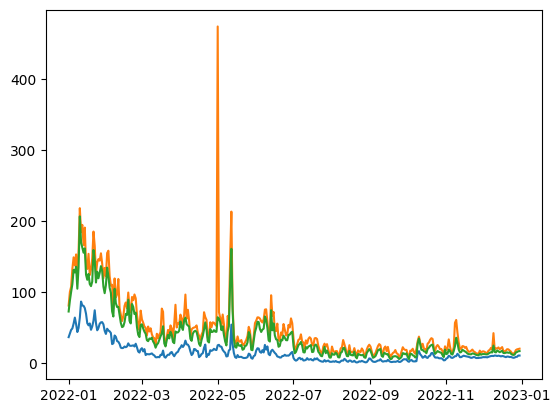

In [68]:
# eth price in 2022
f = open("results/eth_price_2022.json", "r")
data = json.load(f)
date = []
avg_price = []
med_price = []
min_price = []
for row in data['data']['get_execution']['execution_succeeded']['data'] :
    date.append(parser.parse(row['time']))
    avg_price.append(row['avg_gas_price'])
    med_price.append(row['median_gas_price'])
    min_price.append(row['min_gas_price'])
plt.plot(date, min_price)
plt.plot(date, avg_price)
plt.plot(date, med_price)
plt.show()

# Optimism AMB

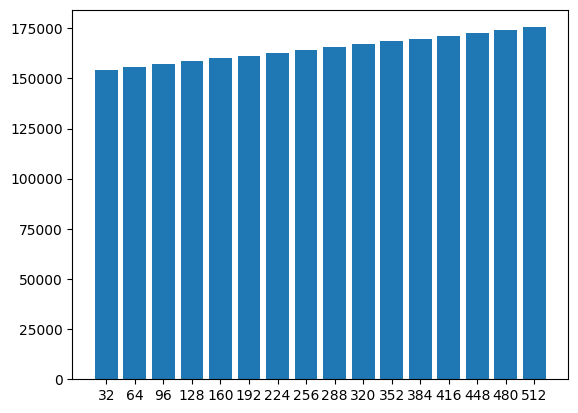

In [35]:
f = open('results/optimism-amb/l1CrossDomainMessenger_sendMessage', 'r')
lines = f.readlines()

number_of_bytes = []
consumed_l1_gas = []

for line in lines:  
    byte, gas = line.split()
    number_of_bytes.append(byte)
    consumed_l1_gas.append(int(gas))
plt.bar(number_of_bytes, consumed_l1_gas)
#plt.plot(number_of_bytes, consumed_fee_l1)
plt.show()

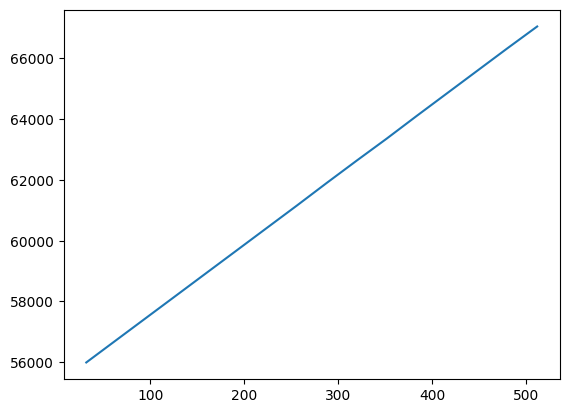

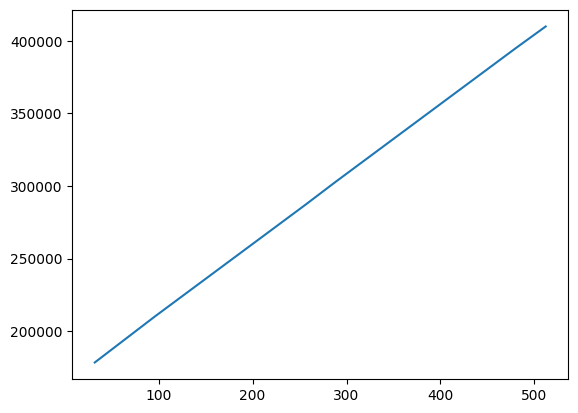

In [68]:
f = open('results/optimism-amb/l2CrossDomainMessenger_relayMessage', 'r')
lines = f.readlines()

number_of_bytes = []
consumed_fee_l1 = []
consumed_gas_l2 = []

for line in lines:  
    byte, l2_gas, l1_fee = line.split()
    number_of_bytes.append(int(byte))
    consumed_gas_l2.append(int(l2_gas))
    consumed_fee_l1.append(int(l1_fee))

# plt.bar(number_of_bytes, consumed_gas_l1)
plt.plot(number_of_bytes, consumed_gas_l2)
plt.show()
plt.plot(number_of_bytes, consumed_fee_l1)
plt.show()

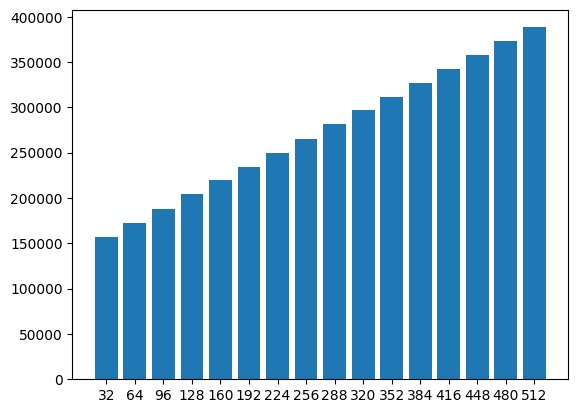

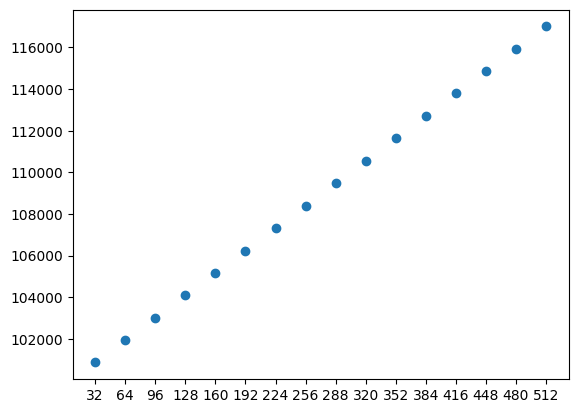

In [70]:
f = open('results/optimism-amb/l2CrossDomainMessenger_sendMessage', 'r')
lines = f.readlines()

number_of_bytes = []
consumed_fee_l1 = []
consumed_gas_l2 = []

for line in lines:  
    byte, l2_gas, l1_fee = line.split()
    number_of_bytes.append(byte)
    consumed_gas_l2.append(int(l2_gas))
    consumed_fee_l1.append(int(l1_fee))

plt.bar(number_of_bytes, consumed_fee_l1)
plt.show()
plt.scatter(number_of_bytes, consumed_gas_l2)
plt.show()

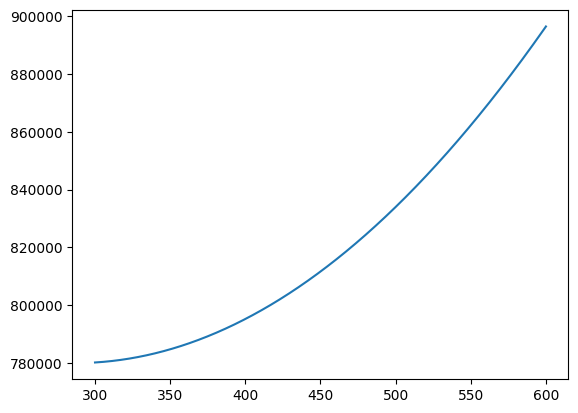

In [34]:
# l1CrossDomainMessenger.relayMessage <L1, L2->L1>
f = open('results/optimism-amb/l1CrossDomainMessenger_relayMessage', 'r')
lines = f.readlines()

message_byte_len = []
consumed_l1_gas = []

for line in lines:  
    byte, l1_gas = line.split()
    message_byte_len.append(int(byte))
    consumed_l1_gas.append(int(l1_gas))

x = message_byte_len
y = consumed_l1_gas

from scipy.interpolate import CubicSpline
xvals = np.linspace(300, 600, 1000)
spl = CubicSpline(x, y) # First generate spline function
y_smooth = spl(xvals) # then evalute for your interpolated points

plt.plot(xvals, y_smooth)
plt.show()

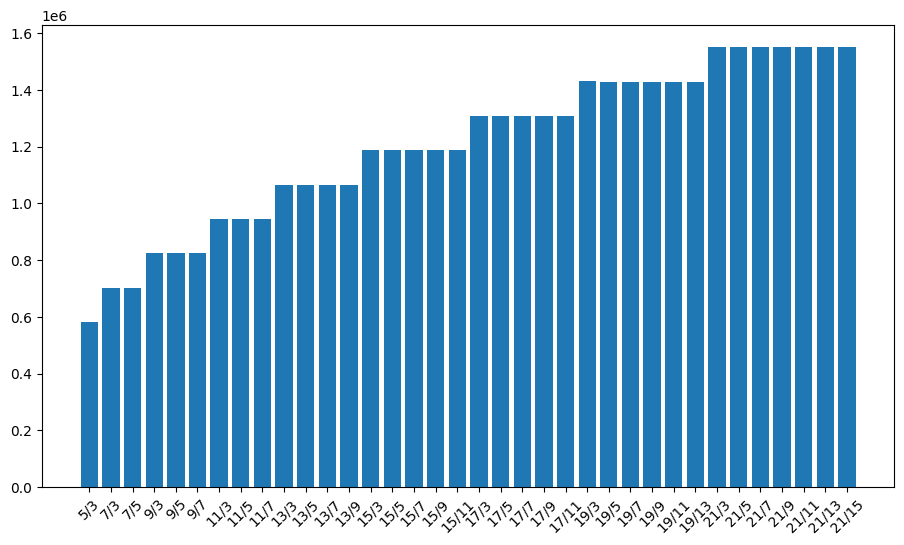

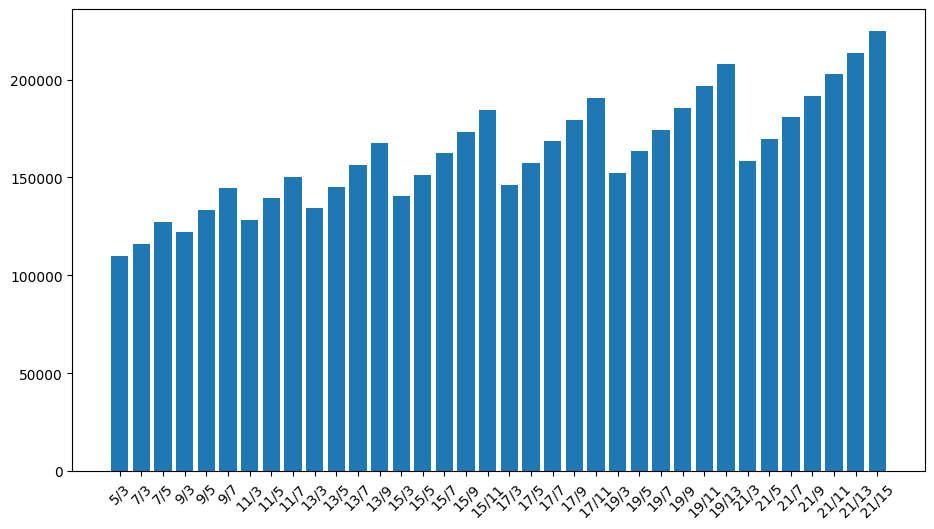

In [56]:
f = open('results/celler/busreceiver_executemessage', 'r')
lines = f.readlines()

validator_sigs = []
consumed_fee_l1 = []
consumed_gas_l2 = []

for line in lines:  
    validator_num, quorum_num, l2_gas, l1_fee = line.split()
    validator_sigs.append("" + validator_num + "/" + quorum_num)
    consumed_gas_l2.append(int(l2_gas))
    consumed_fee_l1.append(int(l1_fee))

plt.figure(figsize=(11,6))
plt.bar(validator_sigs, consumed_fee_l1)
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(11,6))
plt.bar(validator_sigs, consumed_gas_l2)
plt.xticks(rotation = 45)
plt.show()

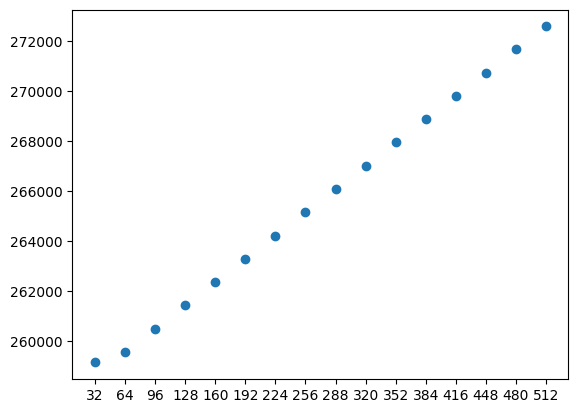

In [57]:
f = open('results/connext/xcall', 'r')
lines = f.readlines()

bytes_num = []
consumed_gas_l2 = []

for line in lines:  
    b_num, l2_gas = line.split()
    bytes_num.append(b_num)
    consumed_gas_l2.append(int(l2_gas))

plt.scatter(bytes_num, consumed_gas_l2)
plt.show()

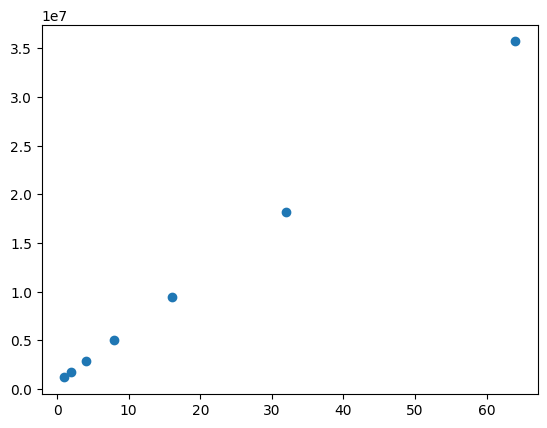

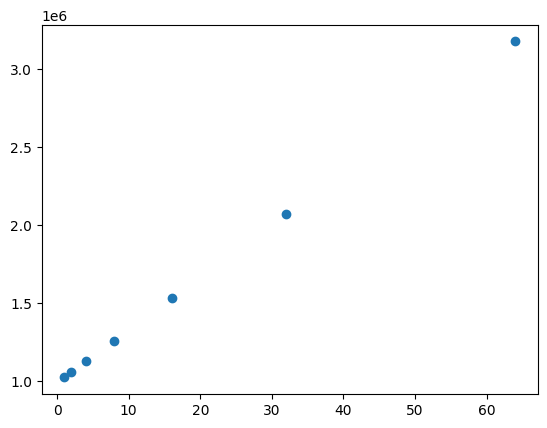

In [58]:
f = open('results/connext/prove_and_process', 'r')
lines = f.readlines()

proofs_num = []
consumed_fee_l1 = []
consumed_gas_l2 = []

for line in lines:  
    p_num, l2_gas, l1_fee = line.split()
    proofs_num.append(int(p_num))
    consumed_gas_l2.append(int(l2_gas))
    consumed_fee_l1.append(int(l1_fee))

plt.scatter(proofs_num, consumed_fee_l1)
plt.show()
plt.scatter(proofs_num, consumed_gas_l2)
plt.show()

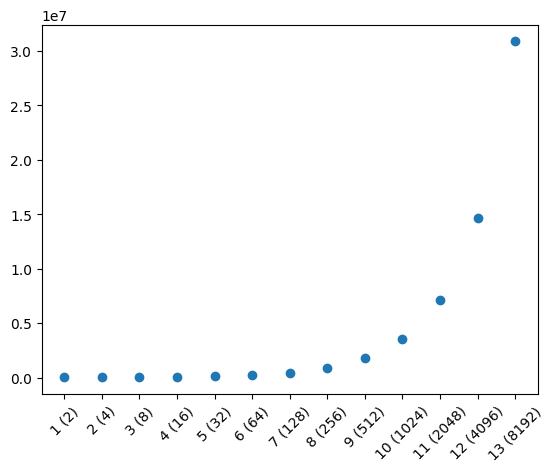

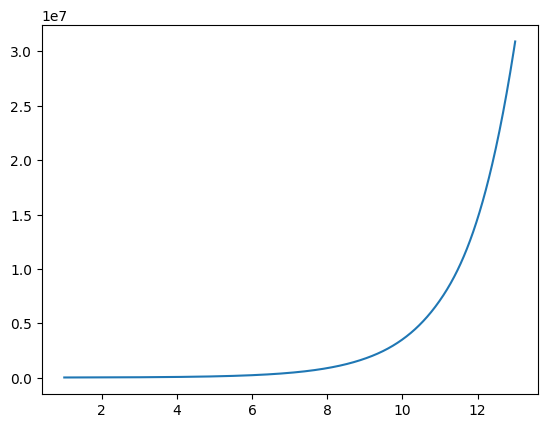

In [37]:
f = open('results/opt-cr-with-merkle/merkle_height_challenging', 'r')
lines = f.readlines()

labels = []
consumed_gas_l2 = []
heights = []

for line in lines:  
    height, nodes_num, l2_gas = line.split()
    heights.append(int(height))
    labels.append("" + height + " (" + nodes_num + ")")
    consumed_gas_l2.append(int(l2_gas))

plt.scatter(labels, consumed_gas_l2)
plt.xticks(rotation = 45)
plt.show()

x = heights
y = consumed_gas_l2

from scipy.interpolate import CubicSpline
xvals = np.linspace(1, 13, 1000)
spl = CubicSpline(x, y) # First generate spline function
y_smooth = spl(xvals) # then evalute for your interpolated points

plt.plot(xvals, y_smooth)
plt.show()

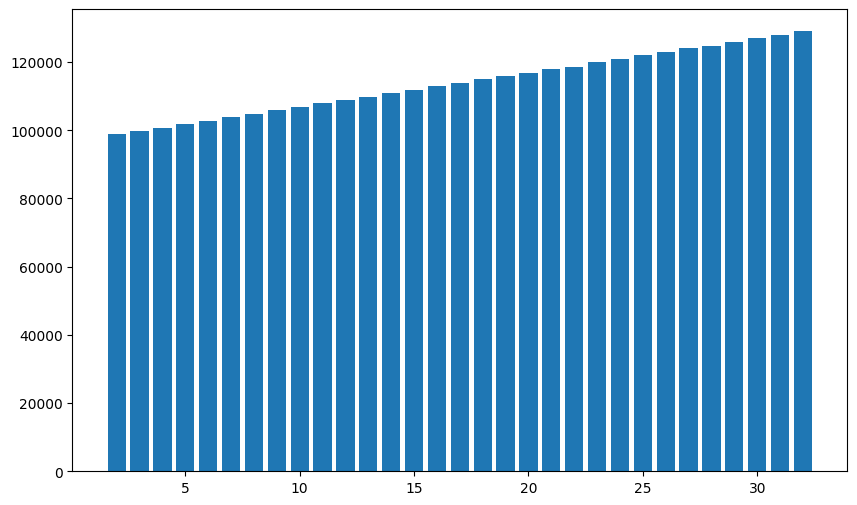

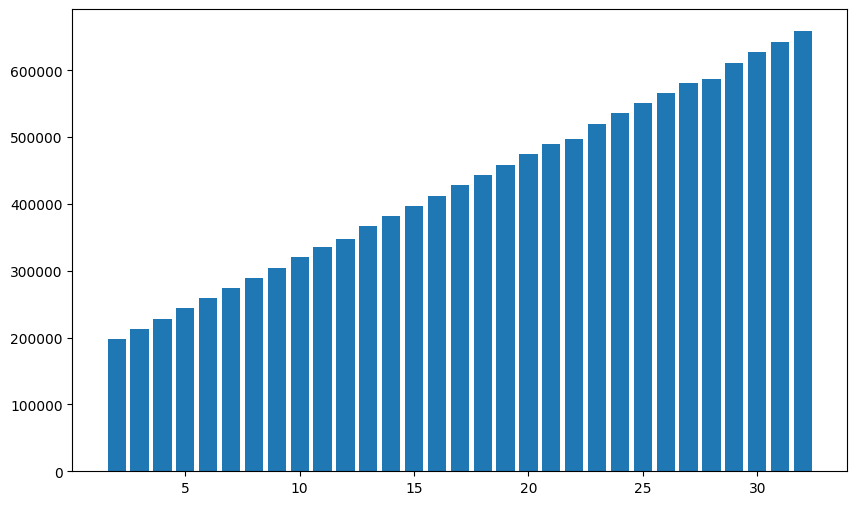

In [72]:
f = open('results/opt-cr-with-merkle/merkle_height_nft_claiming', 'r')
lines = f.readlines()

heights = []
consumed_fee_l1 = []
consumed_gas_l2 = []

for line in lines:  
    height, l2_gas, l1_fee = line.split()
    heights.append(int(height))
    consumed_gas_l2.append(int(l2_gas))
    consumed_fee_l1.append(int(l1_fee))


plt.figure(figsize=(10,6))
plt.bar(heights, consumed_gas_l2)
plt.show()
plt.figure(figsize=(10,6))
plt.bar(heights, consumed_fee_l1)
plt.show()

In [73]:
def get_l2_gas(file_path):
    f = open(file_path, "r")
    data = json.load(f)
    labels = []
    l2_gas = []

    for row in data:
        labels.append(row['name'])
        cost = 0
        for i in row['costs']:
            cost += int(i)
        l2_gas.append(cost)
    return labels, l2_gas

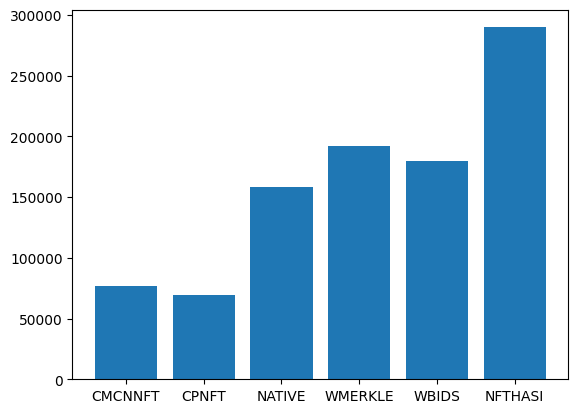

In [74]:
labels, only_user_l2_gas_unlock = get_l2_gas("results/summaries/only_user_l2_gas_unlock.json")
plt.bar(labels, only_user_l2_gas_unlock)
plt.show()

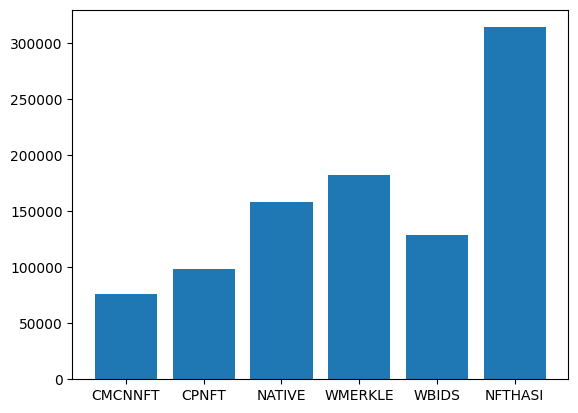

In [75]:
labels, only_user_l2_gas_lock = get_l2_gas("results/summaries/only_user_l2_gas_lock.json")
plt.bar(labels, only_user_l2_gas_lock)
plt.show()

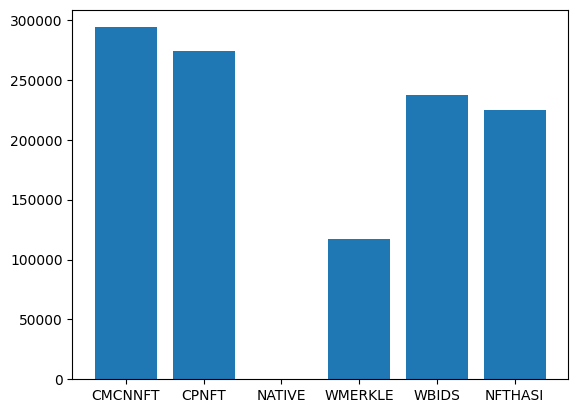

In [76]:
labels, only_relayer_l2_gas_lock = get_l2_gas("results/summaries/only_relayer_l2_gas_lock.json")
plt.bar(labels, only_relayer_l2_gas_lock)
plt.show()

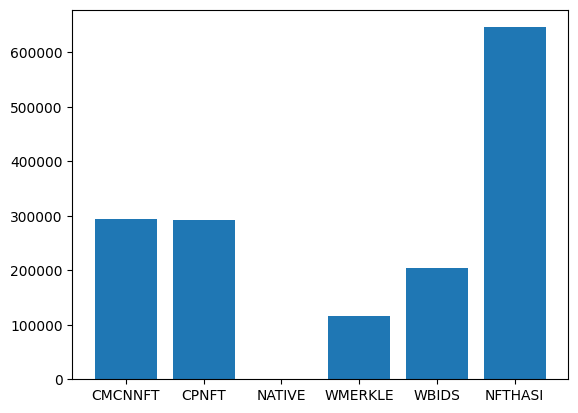

In [77]:
labels, only_relayer_l2_gas_unlock = get_l2_gas("results/summaries/only_relayer_l2_gas_unlock.json")
plt.bar(labels, only_relayer_l2_gas_unlock)
plt.show()

In [78]:
# in GWei
CURRENT_GAS_PRICE = 30

def get_l1_fee(file_path):
    f = open(file_path, "r")
    data = json.load(f)
    labels = []
    gas_fees = []

    for row in data:
        labels.append(row['name'])
        cost = 0
        # already calculated with 30 GWei
        if 'l2_fee_costs' in row:
            for i in row['l2_fee_costs']:
                cost += int(i)
        if 'gas_costs' in row:
            for i in row['gas_costs']:
                cost += int(i) * CURRENT_GAS_PRICE
        gas_fees.append(cost)
    return labels, gas_fees

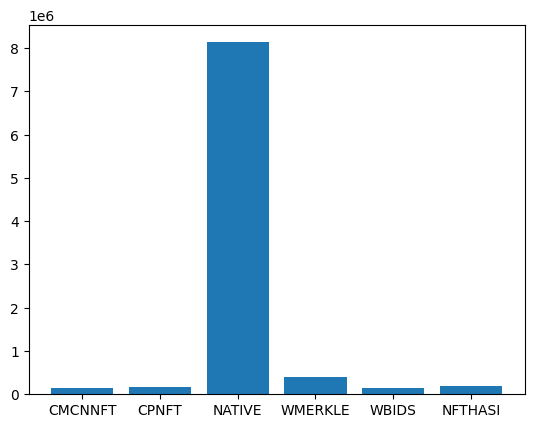

In [79]:
labels, only_user_l1_fee_lock = get_l1_fee("results/summaries/only_user_l1_fee_lock.json")
plt.bar(labels, only_user_l1_fee_lock)
plt.show()

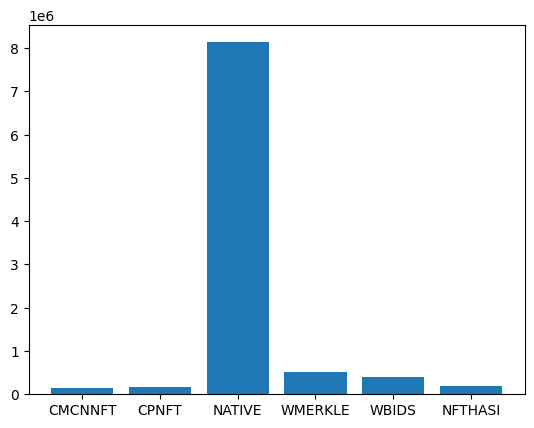

In [80]:
labels, only_user_l1_fee_unlock = get_l1_fee("results/summaries/only_user_l1_fee_unlock.json")
plt.bar(labels, only_user_l1_fee_unlock)
plt.show()

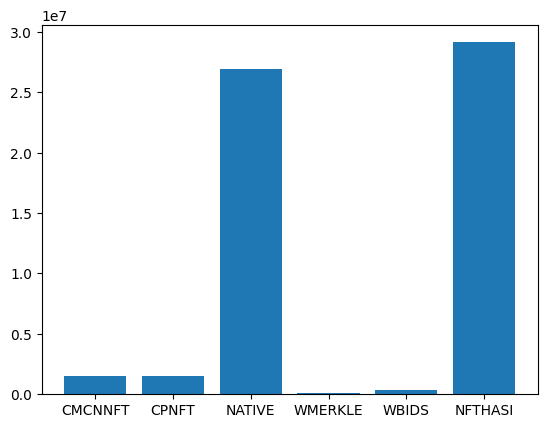

In [81]:
labels, only_relayer_l1_fee_lock = get_l1_fee("results/summaries/only_relayer_l1_fee_lock.json")
plt.bar(labels, only_relayer_l1_fee_lock)
plt.show()

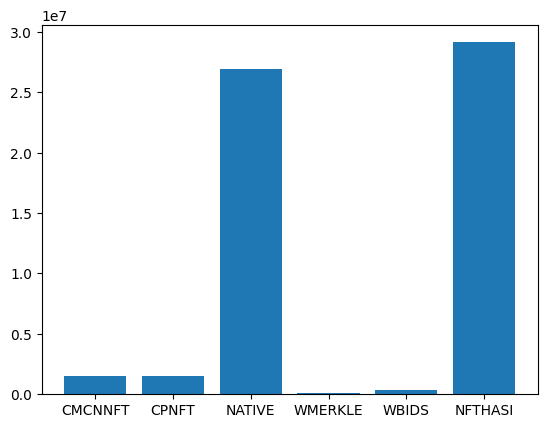

In [82]:
labels, only_relayer_l1_fee_unlock = get_l1_fee("results/summaries/only_relayer_l1_fee_unlock.json")
plt.bar(labels, only_relayer_l1_fee_unlock)
plt.show()

# Summary of lock, unlock, cycle

In [83]:
# Gas prices on L2 default to 0.001 Gwei
CURRENT_OPT_GAS_COST = 0.001
def transform_l2_cost(input):
    return [cost * CURRENT_OPT_GAS_COST for cost in input]

def sum_two_list(input_1, input_2):
    ret = []
    for i in range(0, len(input_1)):
        ret.append(int(input_1[i] + input_2[i]))
    return ret

In [107]:
l2_gas_lock = sum_two_list(only_user_l2_gas_lock, only_relayer_l2_gas_lock)
l2_gas_unlock = sum_two_list(only_user_l2_gas_unlock, only_relayer_l2_gas_unlock)

l1_fee_lock = sum_two_list(only_user_l1_fee_lock, only_relayer_l1_fee_lock)
l1_fee_unlock = sum_two_list(only_user_l1_fee_unlock, only_relayer_l1_fee_unlock)

full_cost_lock = sum_two_list(l1_fee_lock, transform_l2_cost(l2_gas_lock))
full_cost_unlock = sum_two_list(l1_fee_unlock, transform_l2_cost(l2_gas_unlock))

# it is not that relevant
# full_cost_cycle = sum_two_list(full_cost_lock, full_cost_unlock)

def predictedUserL2Cost(labels, only_user_l2_gas, only_relayer_l2_gas):
    ret = []
    for i in range(0, len(labels)):
        if labels[i] == 'WMERKLE':
            ret.append(only_user_l2_gas[i] + only_relayer_l2_gas[i]/4)
        else:
            ret.append(only_user_l2_gas[i] + only_relayer_l2_gas[i])
    return ret

# l1 gas costs and l2 fee costs in GWei
def predictedUserL1Cost(labels, only_user_l2_fee_costs, only_user_l1_gas_costs, only_relayer_l2_fee_costs, only_relayer_l1_gas_costs):
    ret = []
    for i in range(0, len(labels)):
        if labels[i] == 'WMERKLE':
            ret.append(only_user_l2_fee_costs[i] + only_user_l1_gas_costs[i] + only_relayer_l2_fee_costs[i]/4 + only_relayer_l1_gas_costs[i]/4)
        elif labels[i] == 'NFTHASI':
            ret.append(only_user_l2_fee_costs[i] + only_user_l1_gas_costs[i] + only_relayer_l2_fee_costs[i] + only_relayer_l1_gas_costs[i]/128)
        else:
            ret.append(only_user_l2_fee_costs[i] + only_user_l1_gas_costs[i] + only_relayer_l2_fee_costs[i] + only_relayer_l1_gas_costs[i])
    return ret

def get_l1_data(file_path):
    f = open(file_path, "r")
    data = json.load(f)
    labels = []
    fee_costs = []
    gas_costs = []
    
    for row in data:
        labels.append(row['name'])
        # already calculated with 30 GWei
        if 'l2_fee_costs' in row:
            cost = 0
            for i in row['l2_fee_costs']:
                cost += int(i)
            fee_costs.append(cost)
        else:
            fee_costs.append(0)
        if 'gas_costs' in row:
            cost = 0
            for i in row['gas_costs']:
                cost += int(i) * CURRENT_GAS_PRICE
            gas_costs.append(cost)
        else:
            gas_costs.append(0)
    return labels, fee_costs, gas_costs

labels, only_user_l2_fee_costs_lock, only_user_l1_gas_costs_lock = get_l1_data("results/summaries/only_user_l1_fee_lock.json")
labels, only_relayer_l2_fee_costs_lock, only_relayer_l1_gas_costs_lock = get_l1_data("results/summaries/only_relayer_l1_fee_lock.json")

labels, only_user_l2_fee_costs_unlock, only_user_l1_gas_costs_unlock = get_l1_data("results/summaries/only_user_l1_fee_unlock.json")
labels, only_relayer_l2_fee_costs_unlock, only_relayer_l1_gas_costs_unlock = get_l1_data("results/summaries/only_relayer_l1_fee_unlock.json")

predicted_user_l1_cost_lock = predictedUserL1Cost(labels, only_user_l2_fee_costs_lock, only_user_l1_gas_costs_lock, only_relayer_l2_fee_costs_lock, only_relayer_l1_gas_costs_lock)
predicted_user_l1_cost_unlock = predictedUserL1Cost(labels, only_user_l2_fee_costs_unlock, only_user_l1_gas_costs_unlock, only_relayer_l2_fee_costs_unlock, only_relayer_l1_gas_costs_unlock)

predicted_user_l2_cost_lock = predictedUserL2Cost(labels, only_user_l2_gas_lock, only_relayer_l2_gas_lock)
predicted_user_l2_cost_unlock = predictedUserL2Cost(labels, only_user_l2_gas_unlock, only_relayer_l2_gas_unlock)

predicted_user_full_cost_lock = sum_two_list(predicted_user_l1_cost_lock, transform_l2_cost(predicted_user_l2_cost_lock))
predicted_user_full_cost_unlock = sum_two_list(predicted_user_l1_cost_unlock, transform_l2_cost(predicted_user_l2_cost_unlock))


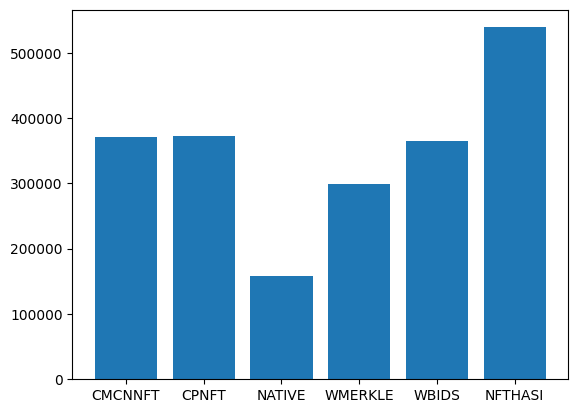

In [108]:
plt.bar(labels, l2_gas_lock)
plt.show()

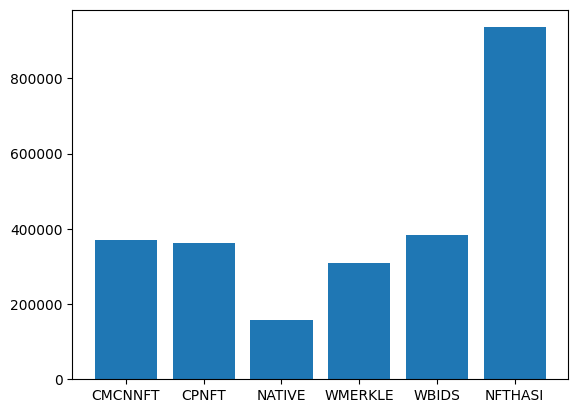

In [109]:
plt.bar(labels, l2_gas_unlock)
plt.show()

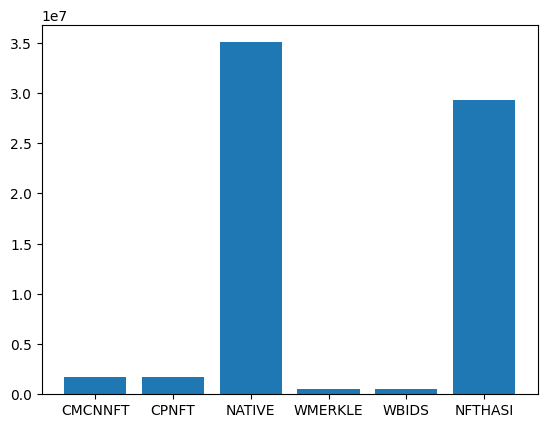

In [110]:
plt.bar(labels, l1_fee_lock)
plt.show()

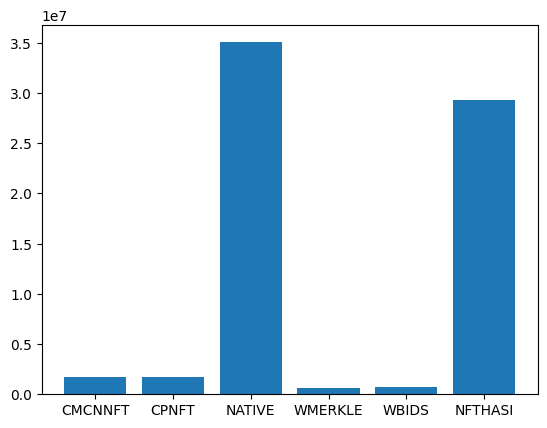

In [111]:
plt.bar(labels, l1_fee_unlock)
plt.show()

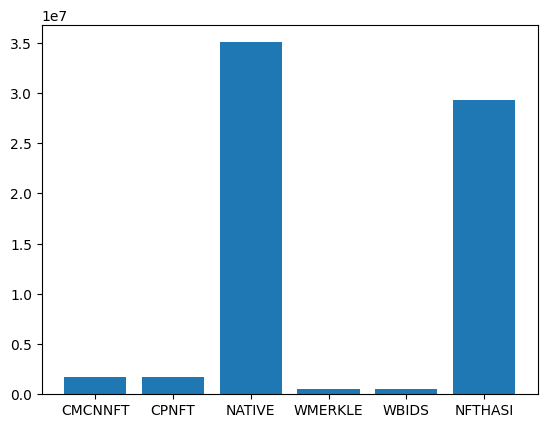

In [112]:
plt.bar(labels, full_cost_lock)
plt.show()

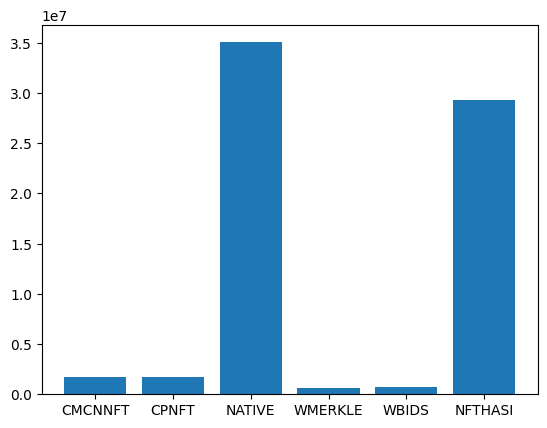

In [113]:
plt.bar(labels, full_cost_unlock)
plt.show()

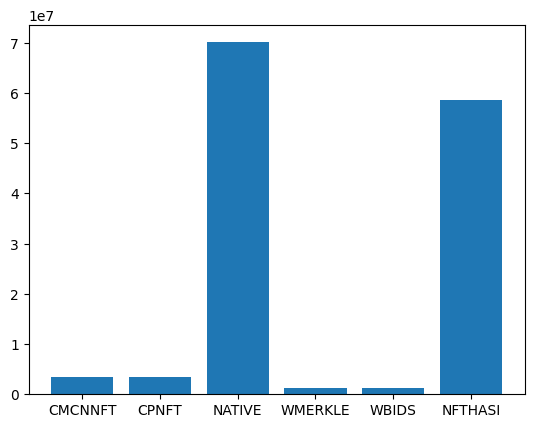

In [114]:
plt.bar(labels, full_cost_cycle)
plt.show()

# Prediction for wrapping, unwrapping

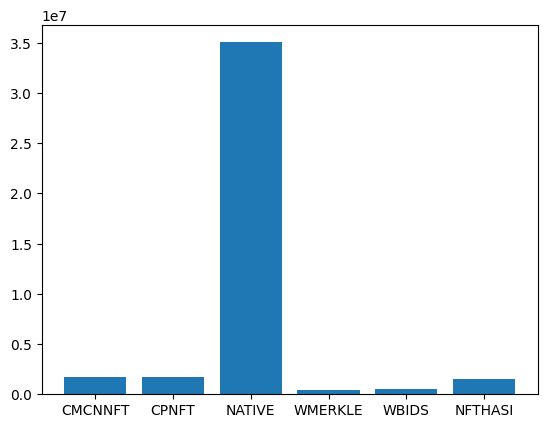

In [115]:
plt.bar(labels, predicted_user_l1_cost_lock)
plt.show()

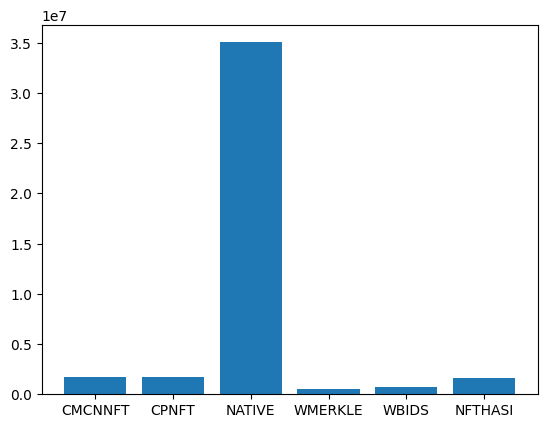

In [116]:
plt.bar(labels, predicted_user_l1_cost_unlock)
plt.show()

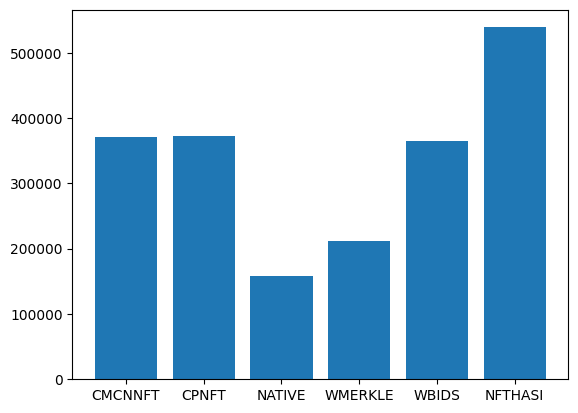

In [117]:
plt.bar(labels, predicted_user_l2_cost_lock)
plt.show()

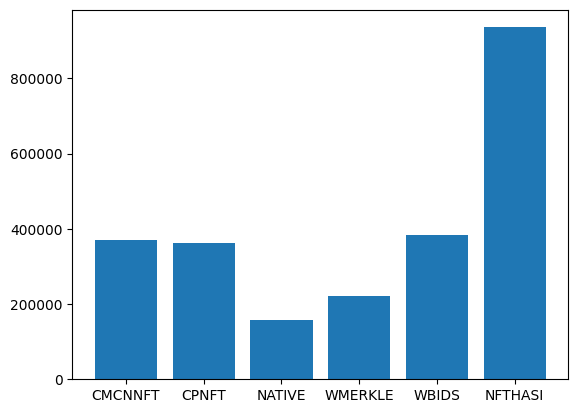

In [118]:
plt.bar(labels, predicted_user_l2_cost_unlock)
plt.show()

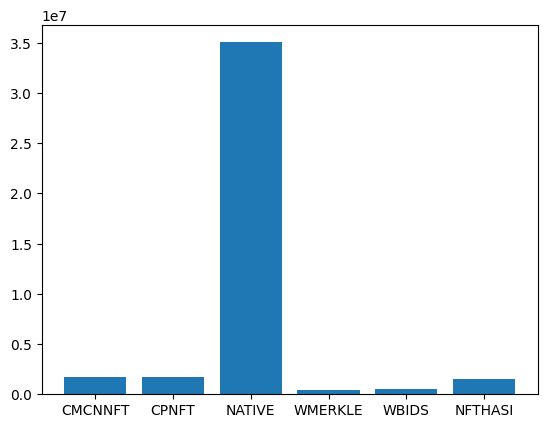

In [119]:
plt.bar(labels, predicted_user_full_cost_lock)
plt.show()

In [ ]:
plt.bar(labels, predicted_user_full_cost_unlock)
plt.show()

In [ ]:
time_lock = []
time_unlock = []